In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import pickle
from copy import copy
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [ ]:
dir  = r"C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\sonnet\LT402 Design/"
chip = 'LT402_32x32_4-8GHz'
path = dir + chip + '/'
with open('LT402chip5_master.pkl', 'rb') as f:
    master = pickle.load(f)
kid_id_board = np.load( path + chip + '_id.npy')
f0_mapped = master['measured']['f0']


In [2]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip5_BF_20250821\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=116, plot=False)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)


,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,1,-116.0,0.099975,4.035940,1.950823e-07,28592.675231,73.770395,48456.208729,104.469159,69750.562719,328.792535,-78.699897,0.000020,0.004127
1,2,-116.0,0.100024,4.043918,1.888911e-07,28027.891094,68.574824,41525.635239,88.689124,86227.444350,490.740221,-78.202853,0.000024,0.110251
2,3,-116.0,0.099896,4.055611,1.226713e-07,41032.857922,97.134680,50961.691803,118.630244,210609.209944,2212.879283,-75.781302,0.000024,0.056540
3,4,-116.0,0.100008,4.059465,1.468317e-07,44689.515038,138.220416,66975.117231,178.971022,134305.794512,968.529937,-76.226521,0.000026,-0.023001
4,5,-116.0,0.099968,4.066546,1.668747e-07,30829.170333,73.231958,40080.108840,89.813688,133568.772663,1117.084441,-77.221551,0.000029,-0.133272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,985,-116.0,0.099989,8.024891,3.477435e-07,30184.866758,69.441740,34296.000152,84.315906,251808.952865,4340.847291,-76.728148,0.000056,-0.034895
985,986,-116.0,0.099993,8.032763,4.269193e-07,24446.607034,54.386187,22771.898357,82.047354,-332413.427004,11001.387287,-76.781119,0.000062,0.214301
986,987,-116.0,0.100065,8.055327,3.477494e-07,27064.623632,55.536188,30436.510635,70.465501,244300.210648,4277.681126,-77.157408,0.000055,-0.263348
987,988,-116.0,0.099976,8.092642,3.448959e-07,22556.772555,36.686956,24385.891202,49.170978,300727.895586,6904.575243,-77.777346,0.000034,0.257229


In [3]:
with open('LT402chip5_Qs.pkl', 'wb') as f:
    pickle.dump(df, f)

In [4]:
with open('LT402chip5_Qs.pkl', 'rb') as f:
    df = pickle.load(f)
display(df)

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,1,-116.0,0.099975,4.035940,1.950823e-07,28592.675231,73.770395,48456.208729,104.469159,69750.562719,328.792535,-78.699897,0.000020,0.004127
1,2,-116.0,0.100024,4.043918,1.888911e-07,28027.891094,68.574824,41525.635239,88.689124,86227.444350,490.740221,-78.202853,0.000024,0.110251
2,3,-116.0,0.099896,4.055611,1.226713e-07,41032.857922,97.134680,50961.691803,118.630244,210609.209944,2212.879283,-75.781302,0.000024,0.056540
3,4,-116.0,0.100008,4.059465,1.468317e-07,44689.515038,138.220416,66975.117231,178.971022,134305.794512,968.529937,-76.226521,0.000026,-0.023001
4,5,-116.0,0.099968,4.066546,1.668747e-07,30829.170333,73.231958,40080.108840,89.813688,133568.772663,1117.084441,-77.221551,0.000029,-0.133272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,985,-116.0,0.099989,8.024891,3.477435e-07,30184.866758,69.441740,34296.000152,84.315906,251808.952865,4340.847291,-76.728148,0.000056,-0.034895
985,986,-116.0,0.099993,8.032763,4.269193e-07,24446.607034,54.386187,22771.898357,82.047354,-332413.427004,11001.387287,-76.781119,0.000062,0.214301
986,987,-116.0,0.100065,8.055327,3.477494e-07,27064.623632,55.536188,30436.510635,70.465501,244300.210648,4277.681126,-77.157408,0.000055,-0.263348
987,988,-116.0,0.099976,8.092642,3.448959e-07,22556.772555,36.686956,24385.891202,49.170978,300727.895586,6904.575243,-77.777346,0.000034,0.257229


filtered: 397 / 989


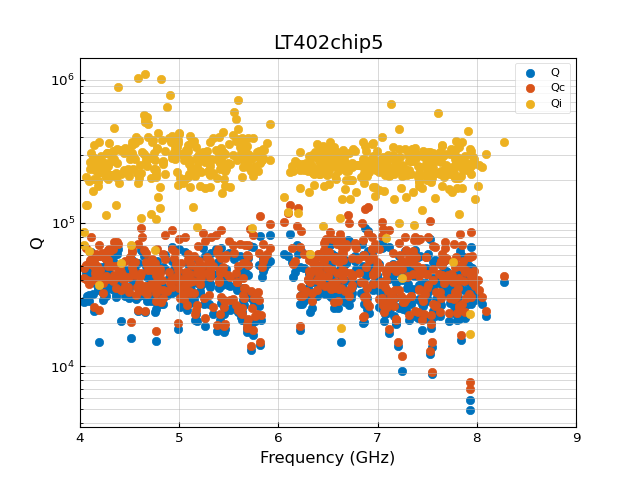

In [6]:
f0_Q = df['f0']
Ql = df['Ql']
Qc = df['Qc']
Qi = df['Qi']
phi = df['phi']

min_df = 0.0005
df0s = np.asarray(f0_Q)[1:] - np.asarray(f0_Q)[:-1]
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))

Qi_mask = (Qi > 1e4) & (Qi < 2e6)
Qc_mask = Qc < 1.5e5
mask = Qi_mask & Qc_mask & ~too_close_mask
# mask = np.ones(len(df), dtype=bool)  # all
df_filtered = copy(df)
df_filtered[~mask] = np.nan
f0_Q = df_filtered['f0']
Ql = df_filtered['Ql']
Qc = df_filtered['Qc']
Qi = df_filtered['Qi']
phi = df_filtered['phi']
print('filtered:', np.sum(mask==False), '/', len(mask))
fig, ax = plt.subplots()
ax.set_title('LT402chip5')
ax.set_yscale('log')
ax.scatter(f0_Q, Ql, label='Q')
ax.scatter(f0_Q, Qc, label='Qc')
ax.scatter(f0_Q, Qi, label='Qi')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
# ax.set_ylim(1e4,2e6)
ax.set_ylabel('Q')
ax.legend()

In [ ]:
fig, ax = plt.subplots()
ax.plot(f0_mapped, '.')
ax.plot(f0_Q, '.')

In [ ]:
nr = len(f0_mapped)
f0_dark = f0_Q
idxs = np.empty(nr)
idxs[:] = np.nan
for id, f0 in enumerate(f0_mapped):
    if ~np.isnan(f0):
        closest =  np.nanargmin(np.abs(f0 - f0_dark))
        if ~np.isnan(f0_dark[closest]):
            tone = f0_dark[closest]
            if closest in idxs:
                idx_location = np.where(idxs == closest)[0]
                if len(idx_location) == 1:
                    prev_id = idx_location[0]
                    prev_f0 = f0_mapped[prev_id]
                    curr_diff = np.abs(f0 - tone)
                    prev_diff = np.abs(prev_f0 - tone)
                    if curr_diff < prev_diff:
                        idxs[prev_id] = np.nan
                    else:
                        closest = np.nan
                else:
                    print('more than one match')
                    closest = np.nan
            else:
                pass
        else:
            closest = np.nan
    else:
        closest = np.nan
    idxs[id] = closest
print(idxs)


In [117]:
df_sorted = pd.DataFrame(np.nan, index=np.arange(nr), columns=df_filtered.columns)
for i, idx in enumerate(idxs):
    if ~np.isnan(idx):
        df_sorted.iloc[i] = df_filtered.iloc[int(idx)]
    else:
        pass

In [ ]:
fig, axes = plt.subplot_mosaic('abcd;eeee', figsize=(12,6))
Ql = np.asarray(df_sorted['Ql'])
Qi = np.asarray(df_sorted['Qi'])
Qc = np.asarray(df_sorted['Qc'])
phi = np.asarray(df_sorted['phi'])
ax = axes['a']
ax.imshow(Ql[kid_id_board])
ax.set_title('Ql')
ax = axes['b']
ax.imshow(Qc[kid_id_board])
ax.set_title('Qc')
ax = axes['c']
ax.imshow(Qi[kid_id_board], vmin=2e5, vmax=1e6)
ax.set_title('Qi')
ax = axes['d']
ax.imshow(phi[kid_id_board])
ax.set_title('phi')
ax = axes['e']
ax.plot(f0_mapped, Ql, '.', label='Ql')
ax.plot(f0_mapped, Qc, '.', label='Qc')
ax.plot(f0_mapped, Qi, '.', label='Qi')
ax.set_yscale('log')
ax.legend()


In [74]:
keys = ['Ql', 'Qi', 'Qc', 'phi']
for key in keys:
    master['measured'][key] = np.asarray(df_sorted[key])

In [75]:
# with open('LT402chip6_master.pkl', 'wb') as f:
#     pickle.dump(master, f)